## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
X_boston,y_boston = data, target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [6]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD' ,'TAX' ,'PTRATIO', 'B', 'LSTAT']
Keys = ['data', 'target', 'feature_names', 'DESCR', 'filename']

In [17]:
print('Keys:', Keys)
print('Feature names:',feature_names)

Keys: ['data', 'target', 'feature_names', 'DESCR', 'filename']
Feature names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [8]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [16]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [24]:
df = pd.DataFrame(data=data,columns=feature_names)
df['price']=target


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Q2: Print the head rows of the dataframe.

In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Q3: Use histogram to show the distribution of House Prices.

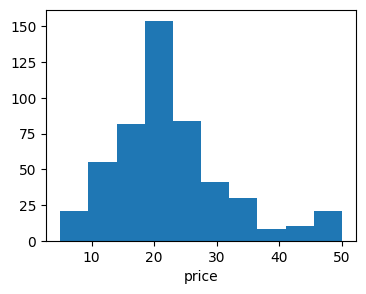

In [34]:
plt.figure(figsize=(4,3))
plt.hist(df['price'])
plt.xlabel('price')
plt.show()

## Q4: Use a heatmap to show the correlation between features and the target labels.

<AxesSubplot: >

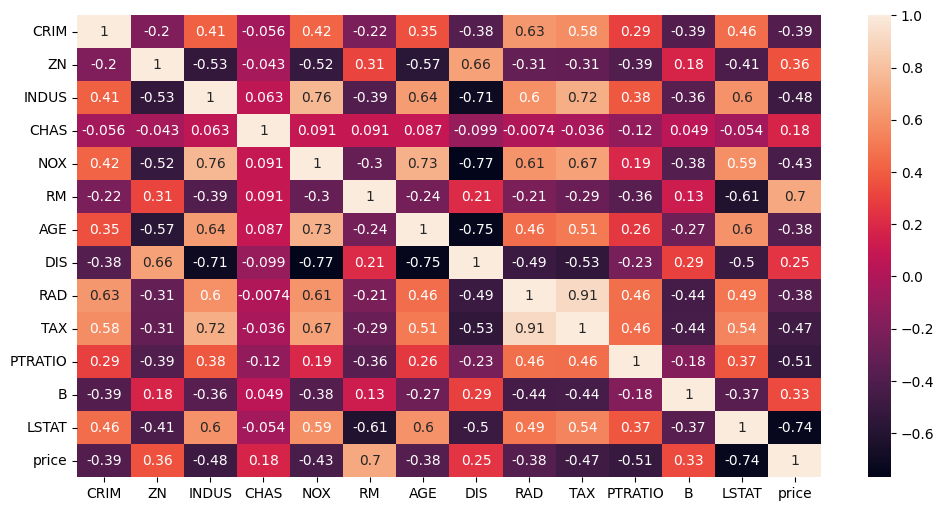

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

## Q5: Use a lmplot to draw the relations between price and LSTAT.

<AxesSubplot: xlabel='price', ylabel='LSTAT'>

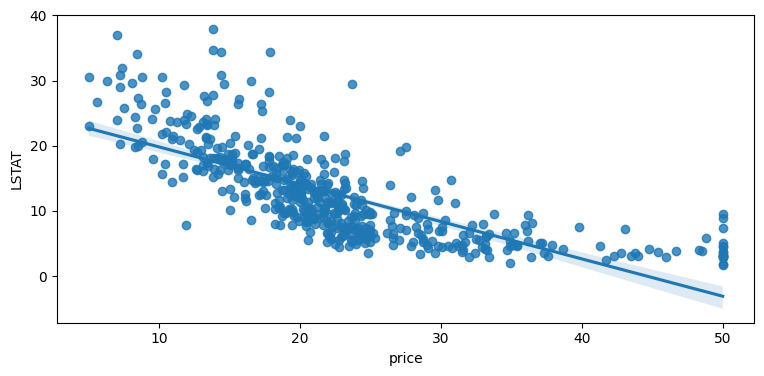

In [42]:
plt.figure(figsize=(9,4))
sns.regplot(data=df,x='price',y='LSTAT')

## Q6: Use a lmplot to draw the relations between price and RM.

<AxesSubplot: xlabel='price', ylabel='RM'>

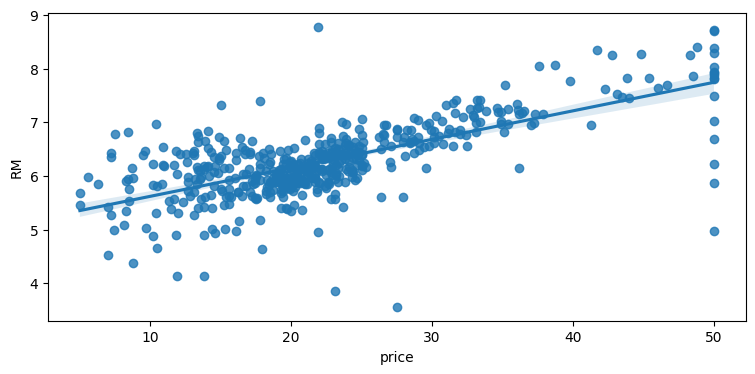

In [43]:
plt.figure(figsize=(9,4))
sns.regplot(data=df,x='price',y='RM')

In [44]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [47]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS',
         'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
        'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Q8: Build a Linear Regression Model.

In [49]:
lm = LinearRegression()

## Q9: Train the Model.

In [50]:
lm.fit(X_train, y_train)

LinearRegression()

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

In [51]:
print(lm.intercept_)

40.21892901255097


In [53]:
coeff = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficinent'])
coeff

,Coefficinent
CRIM,-0.088505
ZN,0.050293
INDUS,0.020348
CHAS,3.754271
NOX,-17.748371
RM,3.247765
AGE,0.012001
DIS,-1.409161
RAD,0.263881
TAX,-0.010344


In [54]:
predictions = lm.predict(X_test)
predictions

array([40.11113508, 27.38971873, 16.64700435, 16.98475572, 31.12920137,
       32.17489772, 38.5534506 ,  8.16734819, 33.48547457,  7.21877263,
       30.45404514, 13.44085219, 16.25354375, 17.34359227, 25.1543491 ,
       20.44171457,  7.30340549, 33.13892161, 28.41293108, 24.58522513,
       12.44673568, 20.25489284, 22.48601345, 24.42119495, 33.92740928,
       18.63104614, 32.32820984, 18.67352155, 27.36115374, 34.46174375,
       19.84089751, 18.40373436, 37.15821555, 44.94610923, 30.27513579,
       22.00760066, 16.0127978 , 18.16328402,  4.33298095, 30.93867591,
       24.15262229, 17.17277775, 34.10334259, 13.89433899, 17.46893797,
       25.30893285, 30.35309561, 16.10339452, 26.91513852, 22.98227547,
       32.14815603, 37.34454946, 22.90074019, 17.56894548, 30.18430234,
        0.10360753, 20.22573888, 16.82248142, 23.15487984, 21.16760077,
       30.5734497 ,  3.15502223, 15.92340596, 20.06361892, 10.43608925,
       24.28745773, 24.00445196, 19.86245393, 17.63614975, 19.44

In [55]:
Real_Values = np.array(y_test)
Real_Values

array([50. , 36.2, 11.7, 14.9, 30.8, 36.1, 50. , 13.2, 41.3,  8.5, 23.5,
       13.3, 20.2, 18.6, 18.5, 27.9, 10.4, 28.5, 28.4, 23.1, 12.8, 21.7,
       11.9, 29.6, 37.3, 19.9, 29. , 18. , 50. , 34.6, 24.3, 18.2, 44. ,
       50. , 30.7, 22.6, 14.1, 14.5,  8.4, 32.5, 24.3, 20.6, 43.8, 11.5,
       19.9, 23.8, 28.7, 17.8, 23.9, 33. , 31.5, 21.9, 17.4, 15. , 34.7,
       13.8, 20.4, 19.5, 22.4, 16.8, 32.9, 14.4, 27.5, 20.1,  8.3, 27.5,
       25. , 17.1, 10.9, 18.5, 19.2, 20.7, 17. , 19.2, 27.1, 15.6, 50. ,
       14.4, 22.8,  7.2, 15.6, 19.5, 29.4, 15.4, 16.5, 19.8, 21.4, 32. ,
       24.7, 16.1, 11.3, 15.6, 25. , 31. ,  5. , 50. , 14.6, 31.6,  5. ,
       20.9, 31.7, 20.1, 22.3, 22.8, 19.6, 23.2, 23.8, 35.4, 44.8, 31.6,
       19.4, 48.3, 24.7, 20. , 32.7, 22. , 22.5, 29.1, 23.8, 24.1, 13.4,
       16.2, 20.9, 32.4, 24.7, 23. , 10.9, 10.2, 13.1, 23.4, 22.1, 34.9,
       20.5, 24.5, 29.8, 25. , 25.1, 22. , 46.7, 20.4, 13.4, 42.3, 37.2,
       18.4, 24.8, 19.9, 20.4, 28.1, 20.7, 29.1, 17

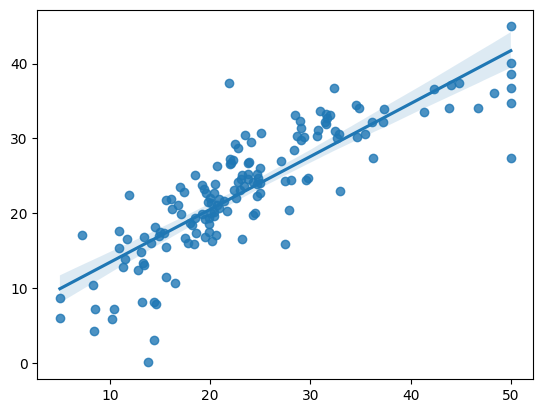

In [59]:
sns.regplot(x=Real_Values,y=predictions);

## Residual Histogram

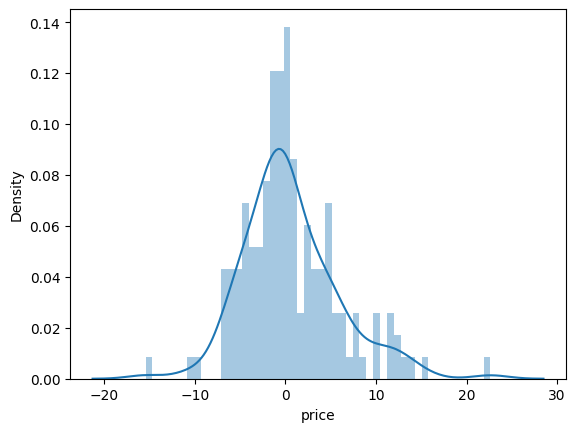

In [62]:
sns.distplot((y_test-predictions),bins=50);

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.835696361418934
MSE: 28.547585271468137
RMSE: 5.34299403625609
